In [6]:
from reader import load_dataframe
import pandas as pd
import os
import glob
from datetime import date
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches
%matplotlib inline

In [7]:
df = load_dataframe()
df.tail()

,city,bikeid,starttime,stoptime,tripduration,start station name,start station latitude,start station longitude,end station name,end station latitude,end station longitude,usertype,birth year,gender,age
631368,San Francisco,2405,2018-05-01 00:07:24.1290,2018-05-01 00:18:09.6860,645,Lakeside Dr at 14th St,37.801319,-122.262642,Telegraph Ave at 27th St,37.816073,-122.267886,Subscriber,1979.0,Male,39.0
631369,San Francisco,2627,2018-05-01 00:15:53.9830,2018-05-01 00:18:09.5370,135,Shattuck Ave at Hearst Ave,37.873792,-122.268618,MLK Jr Way at University Ave,37.871719,-122.273068,Subscriber,1986.0,Female,32.0
631370,San Francisco,2664,2018-05-01 00:10:04.1110,2018-05-01 00:15:20.9810,316,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,5th St at Howard St,37.781752,-122.405127,Subscriber,1992.0,Male,26.0
631371,San Francisco,1236,2018-05-01 00:12:01.7090,2018-05-01 00:15:05.4410,183,Bancroft Way at College Ave,37.869360,-122.254337,Derby St at College Ave,37.861804,-122.253569,Subscriber,1995.0,Male,23.0
631372,San Francisco,3887,2018-05-01 00:02:01.8520,2018-05-01 00:03:20.3590,78,Sanchez St at 17th St,37.763242,-122.430675,17th St at Dolores St,37.763015,-122.426497,Subscriber,NaN,NaN,NaN


In [8]:
df.city.value_counts()

San Francisco    528394
New York         102979
Name: city, dtype: int64

In [9]:
columns = df.columns

In [10]:
#clean up data table

#convert gender
# 0 = unknown, 1=male, 2=female
gender = {1:'f', 2:'m', 0:'unknown'}
df['gender'] = df['gender'].map(gender)

#generate age
def calc_age(birth_year):
    today = date.today()
    return today.year - birth_year
df['age'] = df['birth year'].apply(calc_age)

In [11]:
df.head()

,city,bikeid,starttime,stoptime,tripduration,start station name,start station latitude,start station longitude,end station name,end station latitude,end station longitude,usertype,birth year,gender,age
0,New York,29590,2018-01-01 00:01:46,2018-01-01 00:03:58,132,Grove St PATH,40.719586,-74.043117,Newark Ave,40.721525,-74.046305,Subscriber,1964.0,NaN,54.0
1,New York,29613,2018-01-01 01:27:17,2018-01-01 01:36:38,560,Marin Light Rail,40.714584,-74.042817,Brunswick & 6th,40.726012,-74.050389,Subscriber,1989.0,NaN,29.0
2,New York,31940,2018-01-01 01:29:03,2018-01-01 01:33:58,294,Sip Ave,40.730743,-74.063784,Baldwin at Montgomery,40.723659,-74.064194,Subscriber,1994.0,NaN,24.0
3,New York,31949,2018-01-01 01:59:32,2018-01-01 02:02:49,197,Newark Ave,40.721525,-74.046305,Monmouth and 6th,40.725685,-74.048790,Subscriber,1964.0,NaN,54.0
4,New York,31929,2018-01-01 02:06:18,2018-01-01 02:21:50,932,Exchange Place,40.716247,-74.033459,Newport Pkwy,40.728745,-74.032108,Subscriber,1992.0,NaN,26.0


In [12]:
#age grouping
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_groups = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
df['age groups'] = pd.cut(df['age'], age_bins, labels=age_groups)

In [13]:
#new limited dataframe
bike_data = df[['age', 'age groups', 'gender', 'usertype','starttime', 'start station latitude', 'start station longitude', 
                   'stoptime', 'end station latitude', 'end station longitude', 'tripduration']].copy()
bike_data

,age,age groups,gender,usertype,starttime,start station latitude,start station longitude,stoptime,end station latitude,end station longitude,tripduration
0,54.0,51-60,NaN,Subscriber,2018-01-01 00:01:46,40.719586,-74.043117,2018-01-01 00:03:58,40.721525,-74.046305,132
1,29.0,21-30,NaN,Subscriber,2018-01-01 01:27:17,40.714584,-74.042817,2018-01-01 01:36:38,40.726012,-74.050389,560
2,24.0,21-30,NaN,Subscriber,2018-01-01 01:29:03,40.730743,-74.063784,2018-01-01 01:33:58,40.723659,-74.064194,294
3,54.0,51-60,NaN,Subscriber,2018-01-01 01:59:32,40.721525,-74.046305,2018-01-01 02:02:49,40.725685,-74.048790,197
4,26.0,21-30,NaN,Subscriber,2018-01-01 02:06:18,40.716247,-74.033459,2018-01-01 02:21:50,40.728745,-74.032108,932
5,42.0,41-50,NaN,Subscriber,2018-01-01 02:10:57,40.717732,-74.043845,2018-01-01 02:13:20,40.718489,-74.047727,142
6,24.0,21-30,NaN,Subscriber,2018-01-01 02:38:14,40.714358,-74.066611,2018-01-01 02:44:14,40.719282,-74.071262,360
7,28.0,21-30,NaN,Subscriber,2018-01-01 03:17:40,40.730743,-74.063784,2018-01-01 03:47:35,40.748716,-74.040443,1795
8,30.0,21-30,NaN,Subscriber,2018-01-01 03:21:42,40.717732,-74.043845,2018-01-01 03:26:42,40.712419,-74.038526,300
9,30.0,21-30,NaN,Subscriber,2018-01-01 03:22:47,40.716490,-74.041050,2018-01-01 03:26:59,40.718489,-74.047727,252


In [14]:
#gender count
gender = bike_data['gender'].value_counts().reset_index()
gender

,index,gender


In [15]:
#age
age = bike_data['age'].describe()
print(age)

average_age = bike_data['age'].mean()
print('')
print('the average user age is: '+ str(average_age))

#age bin counts
bike_data['age groups'].value_counts().reset_index()

count    587914.000000
mean         36.360478
std          10.553349
min          16.000000
25%          29.000000
50%          34.000000
75%          42.000000
max         131.000000
Name: age, dtype: float64

the average user age is: 36.36047789302517


,index,age groups
0,31-40,225662
1,21-30,191800
2,41-50,98158
3,51-60,49854
4,61+,15500
5,0-20,6438


In [16]:
df.head()

,city,bikeid,starttime,stoptime,tripduration,start station name,start station latitude,start station longitude,end station name,end station latitude,end station longitude,usertype,birth year,gender,age,age groups
0,New York,29590,2018-01-01 00:01:46,2018-01-01 00:03:58,132,Grove St PATH,40.719586,-74.043117,Newark Ave,40.721525,-74.046305,Subscriber,1964.0,NaN,54.0,51-60
1,New York,29613,2018-01-01 01:27:17,2018-01-01 01:36:38,560,Marin Light Rail,40.714584,-74.042817,Brunswick & 6th,40.726012,-74.050389,Subscriber,1989.0,NaN,29.0,21-30
2,New York,31940,2018-01-01 01:29:03,2018-01-01 01:33:58,294,Sip Ave,40.730743,-74.063784,Baldwin at Montgomery,40.723659,-74.064194,Subscriber,1994.0,NaN,24.0,21-30
3,New York,31949,2018-01-01 01:59:32,2018-01-01 02:02:49,197,Newark Ave,40.721525,-74.046305,Monmouth and 6th,40.725685,-74.048790,Subscriber,1964.0,NaN,54.0,51-60
4,New York,31929,2018-01-01 02:06:18,2018-01-01 02:21:50,932,Exchange Place,40.716247,-74.033459,Newport Pkwy,40.728745,-74.032108,Subscriber,1992.0,NaN,26.0,21-30


In [17]:
df.dtypes['starttime']

dtype('O')

In [18]:
#converting each file to datetime
df['starttime'] = pd.to_datetime(df['starttime'])


In [19]:
df.dtypes['starttime']

dtype('<M8[ns]')

In [20]:
#will display month
df['month'] = df['starttime'].dt.month
#will display hour
df['hour'] = df['starttime'].dt.hour
#will display name of the day
df['day_of_week'] = df['starttime'].dt.weekday_name

In [21]:
df.tail()

,city,bikeid,starttime,stoptime,tripduration,start station name,start station latitude,start station longitude,end station name,end station latitude,end station longitude,usertype,birth year,gender,age,age groups,month,hour,day_of_week
631368,San Francisco,2405,2018-05-01 00:07:24.129,2018-05-01 00:18:09.6860,645,Lakeside Dr at 14th St,37.801319,-122.262642,Telegraph Ave at 27th St,37.816073,-122.267886,Subscriber,1979.0,NaN,39.0,31-40,5,0,Tuesday
631369,San Francisco,2627,2018-05-01 00:15:53.983,2018-05-01 00:18:09.5370,135,Shattuck Ave at Hearst Ave,37.873792,-122.268618,MLK Jr Way at University Ave,37.871719,-122.273068,Subscriber,1986.0,NaN,32.0,31-40,5,0,Tuesday
631370,San Francisco,2664,2018-05-01 00:10:04.111,2018-05-01 00:15:20.9810,316,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,5th St at Howard St,37.781752,-122.405127,Subscriber,1992.0,NaN,26.0,21-30,5,0,Tuesday
631371,San Francisco,1236,2018-05-01 00:12:01.709,2018-05-01 00:15:05.4410,183,Bancroft Way at College Ave,37.869360,-122.254337,Derby St at College Ave,37.861804,-122.253569,Subscriber,1995.0,NaN,23.0,21-30,5,0,Tuesday
631372,San Francisco,3887,2018-05-01 00:02:01.852,2018-05-01 00:03:20.3590,78,Sanchez St at 17th St,37.763242,-122.430675,17th St at Dolores St,37.763015,-122.426497,Subscriber,NaN,NaN,NaN,NaN,5,0,Tuesday


In [22]:
#New York data only
ny_only=df.loc[df['city']=='New York']
ny_only.tail()

,city,bikeid,starttime,stoptime,tripduration,start station name,start station latitude,start station longitude,end station name,end station latitude,end station longitude,usertype,birth year,gender,age,age groups,month,hour,day_of_week
102974,New York,29614,2018-05-31 23:49:52,2018-05-31 23:53:52,239,Dixon Mills,40.721630,-74.049968,Manila & 1st,40.721651,-74.042884,Subscriber,1984.0,NaN,34.0,31-40,5,23,Thursday
102975,New York,29535,2018-05-31 23:57:31,2018-06-01 00:07:23,592,Newark Ave,40.721525,-74.046305,Liberty Light Rail,40.711242,-74.055701,Subscriber,1978.0,NaN,40.0,31-40,5,23,Thursday
102976,New York,29597,2018-05-31 23:57:45,2018-06-01 00:19:32,1307,Brunswick St,40.724176,-74.050656,Grove St PATH,40.719586,-74.043117,Subscriber,1963.0,NaN,55.0,51-60,5,23,Thursday
102977,New York,29668,2018-05-31 23:57:57,2018-06-01 00:19:16,1279,Glenwood Ave,40.727551,-74.071061,Newport Pkwy,40.728745,-74.032108,Subscriber,1993.0,NaN,25.0,21-30,5,23,Thursday
102978,New York,29526,2018-05-31 23:59:54,2018-06-01 00:41:09,2475,Washington St,40.724294,-74.035483,Harborside,40.719252,-74.034234,Subscriber,1971.0,NaN,47.0,41-50,5,23,Thursday


In [23]:
#San Fran data only
sf_only=df.loc[df['city']=='San Francisco']
sf_only.head()

,city,bikeid,starttime,stoptime,tripduration,start station name,start station latitude,start station longitude,end station name,end station latitude,end station longitude,usertype,birth year,gender,age,age groups,month,hour,day_of_week
102979,San Francisco,1035,2018-02-28 23:59:47.097,2018-03-01 00:09:45.1870,598,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,Rhode Island St at 17th St,37.764478,-122.402570,Subscriber,1988.0,NaN,30.0,21-30,2,23,Wednesday
102980,San Francisco,1673,2018-02-28 23:21:16.495,2018-02-28 23:36:59.9740,943,The Embarcadero at Sansome St,37.804770,-122.403234,Union Square (Powell St at Post St),37.788300,-122.408531,Customer,1987.0,NaN,31.0,31-40,2,23,Wednesday
102981,San Francisco,3498,2018-02-28 18:20:55.190,2018-02-28 23:30:42.9250,18587,4th St at Mission Bay Blvd S,37.770407,-122.391198,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,Customer,1986.0,NaN,32.0,31-40,2,18,Wednesday
102982,San Francisco,3129,2018-02-28 18:20:53.621,2018-02-28 23:30:12.4500,18558,4th St at Mission Bay Blvd S,37.770407,-122.391198,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,Customer,1981.0,NaN,37.0,31-40,2,18,Wednesday
102983,San Francisco,1839,2018-02-28 23:15:12.858,2018-02-28 23:29:58.6080,885,San Pedro Square,37.336802,-121.894090,Locust St at Grant St,37.322980,-121.887931,Subscriber,1976.0,NaN,42.0,41-50,2,23,Wednesday


In [24]:
#During what time of day (hours) is the system used the most? San Francisco
sf_hour_counts=sf_only.hour.value_counts()
sf_hour_counts.head()

17    64050
8     59055
18    49332
9     45703
16    40990
Name: hour, dtype: int64

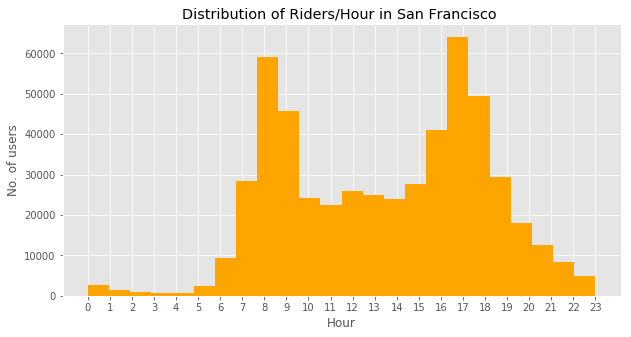

In [25]:
#graph size
plt.figure(figsize=(10,5))

#graph type with no. of bins
plt.hist(sf_only['hour'], bins = 24, color = 'orange')

#lables
plt.xlabel('Hour')
plt.ylabel('No. of users')
plt.xticks(np.arange(0,24,1))


#title
plt.title('Distribution of Riders/Hour in San Francisco ')
#displaying of subscribers
plt.show()

In [26]:
#customers vs. subscribers-SF
sf_rider_counts = sf_only.groupby(['usertype','city']).count()['hour'].reset_index()
sf_rider_counts

,usertype,city,hour
0,Customer,San Francisco,81587
1,Subscriber,San Francisco,446807


In [27]:
#total riders cust + subs
sf_rider_total = sf_only['city'].value_counts()
sf_rider_total


San Francisco    528394
Name: city, dtype: int64

In [28]:
#During what time of day (hour) is the system used the most? New York
ny_hour_counts=ny_only.hour.value_counts()
ny_hour_counts.head()

8     12163
18    10978
17     9984
19     7512
7      6976
Name: hour, dtype: int64

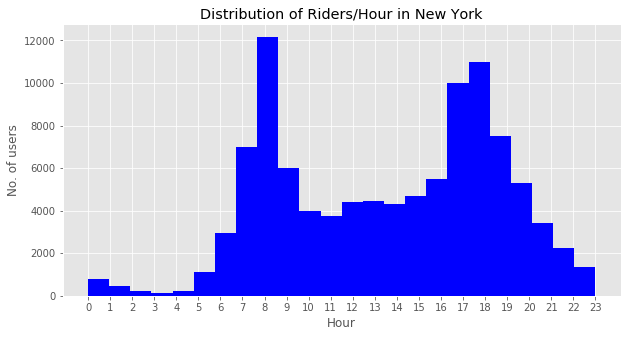

In [29]:
#graph size
plt.figure(figsize=(10,5))

#graph type with no. of bins
plt.hist(ny_only['hour'], bins = 24, color = 'blue')

#lables
plt.xlabel('Hour')
plt.ylabel('No. of users')
plt.xticks(np.arange(0,24,1))


#title
plt.title('Distribution of Riders/Hour in New York')
#displaying of subscribers
plt.show()

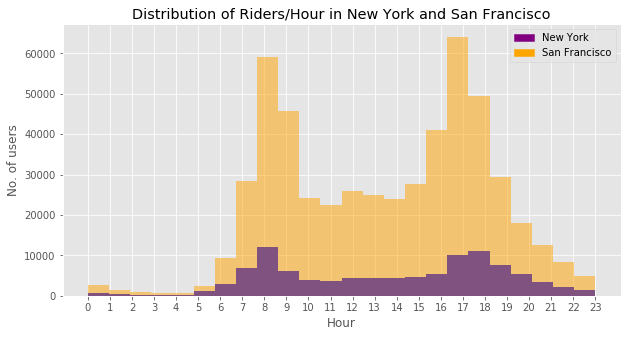

In [30]:
#graph size
plt.figure(figsize=(10,5))

#graph type with no. of bins
plt.hist(ny_only['hour'], bins = 24, color = 'blue', alpha = 1)
plt.hist(sf_only['hour'], bins = 24, color = 'orange', alpha = .5)

New_York =  mpatches.Patch(color='purple', label='New York')
Bay_Area = mpatches.Patch(color='orange', label='San Francisco')
#lables
plt.xlabel('Hour')
plt.ylabel('No. of users')
plt.xticks(np.arange(0,24,1))


#title
plt.title('Distribution of Riders/Hour in New York and San Francisco')
plt.legend(handles =[New_York,Bay_Area])
#displaying of subscribers
plt.show()

In [31]:
#customers vs. subscribers-NY
ny_rider_counts = ny_only.groupby(['usertype','city']).count()['hour'].reset_index()
ny_rider_counts

,usertype,city,hour
0,Customer,New York,5010
1,Subscriber,New York,97969


In [32]:
#total riders cust + subs
ny_rider_total = ny_only['city'].value_counts()
ny_rider_total

New York    102979
Name: city, dtype: int64

In [33]:
#During what day of the week is the system used the most? San Francisco
sf_day_counts=sf_only.day_of_week.value_counts()
sf_day_counts

Thursday     93800
Wednesday    91640
Tuesday      90066
Monday       82198
Friday       80114
Saturday     48338
Sunday       42238
Name: day_of_week, dtype: int64

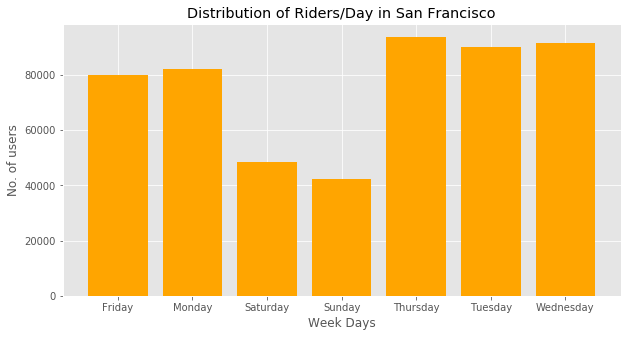

In [34]:
#graph size
plt.figure(figsize=(10,5))

#graph type with no. of bins
sf_riders=[93800,91640,90066,82198,80114,48338,42238]
dow=['Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Friday', 'Saturday', 'Sunday']
plt.bar(dow, sf_riders,color = 'orange', align = 'center')

#lables
plt.xlabel('Week Days')
plt.ylabel('No. of users')
#plt.xticks(np.arange(0,24,1))


#title
plt.title('Distribution of Riders/Day in San Francisco')
#displaying of subscribers
plt.show()

In [35]:
#During what day of the week is the system used the most?New York
ny_day_counts=ny_only.day_of_week.value_counts()
ny_day_counts

Tuesday      17530
Thursday     16649
Wednesday    16553
Monday       16164
Friday       14884
Saturday     11785
Sunday        9414
Name: day_of_week, dtype: int64

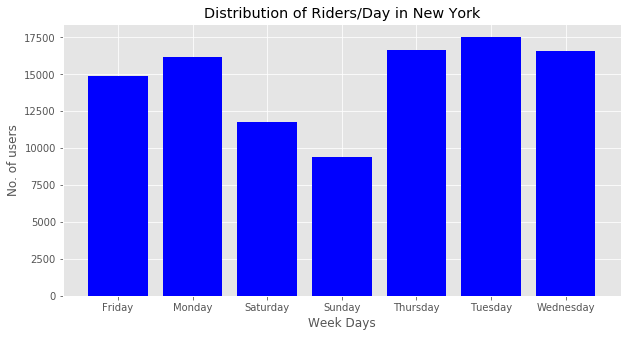

In [36]:
#graph size
plt.figure(figsize=(10,5))

#graph type with no. of bins
ny_riders=[17530, 16649,16553,16164,14884,11785,9414]
dows=['Tuesday', 'Thursday', 'Wednesday', 'Monday', 'Friday', 'Saturday', 'Sunday']
plt.bar(dows, ny_riders,color = 'blue', align = 'center')

#lables
plt.xlabel('Week Days')
plt.ylabel('No. of users')
#plt.xticks(np.arange(0,24,1))


#title
plt.title('Distribution of Riders/Day in New York')
#displaying of subscribers
plt.show()

In [37]:
#During what month is the system used the most? San Francisco
sf_month_counts=sf_only.month.value_counts()
sf_month_counts

5    179125
4    131169
3    111382
2    106718
Name: month, dtype: int64

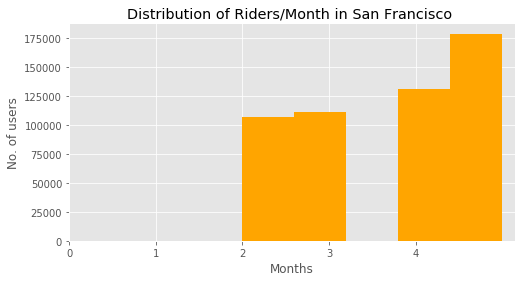

In [38]:
#graph size
plt.figure(figsize=(8,4))

#graph type with no. of bins
plt.hist(sf_only['month'], bins = 5, color = 'orange')

#lables
plt.xlabel('Months')
plt.ylabel('No. of users')
plt.xticks(np.arange(0,5,1))


#title
plt.title('Distribution of Riders/Month in San Francisco ')
#displaying of subscribers
plt.show()

In [39]:
#During what month is the system used the most? New York
ny_month_counts=ny_only.month.value_counts()
ny_month_counts

5    34455
4    23634
3    17109
2    15104
1    12677
Name: month, dtype: int64

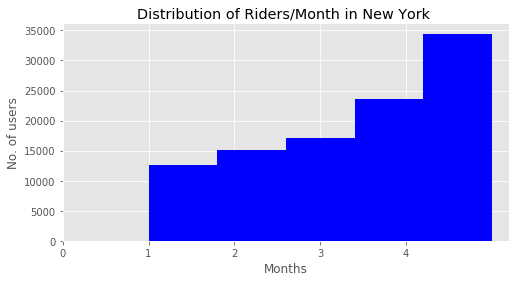

In [40]:
#graph size
plt.figure(figsize=(8,4))

#graph type with no. of bins
plt.hist(ny_only['month'], bins = 5, color = 'blue')

#lables
plt.xlabel('Months')
plt.ylabel('No. of users')
plt.xticks(np.arange(0,5,1))


#title
plt.title('Distribution of Riders/Month in New York ')
#displaying of subscribers
plt.show()

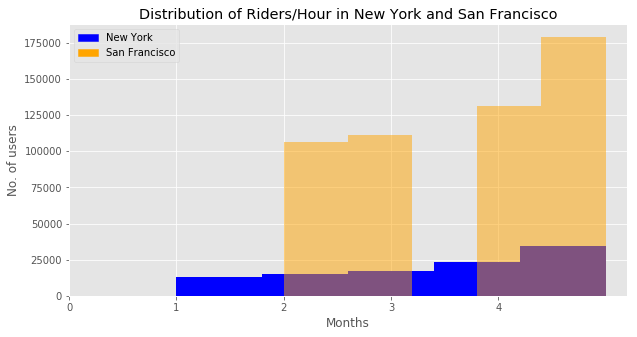

In [41]:
#graph size
plt.figure(figsize=(10,5))

#graph type with no. of bins
plt.hist(ny_only['month'], bins = 5, color = 'blue', alpha = 1)
plt.hist(sf_only['month'], bins = 5, color = 'orange', alpha = .5)

New_York =  mpatches.Patch(color='blue', label='New York')
Bay_Area = mpatches.Patch(color='orange', label='San Francisco')
#lables
plt.xlabel('Months')
plt.ylabel('No. of users')
plt.xticks(np.arange(0,5,1))


#title
plt.title('Distribution of Riders/Hour in New York and San Francisco')
plt.legend(handles =[New_York,Bay_Area])
#displaying of subscribers
plt.show()